# 2016 California Election Exploration

_© Jerod Sun 2020. This is a large project with work in progress._

Todo:
- confidence intervals
- ML algos
- refactor dataframe for F and pval

### Objective: 

Gather insight into voting characteristics and patterns from precinct-by-precinct election results in 2016 combined with census data. Propose questions and targeted campaign strategies based on analysis. Build classification and/or regression models on statistically significant relationships.

### Overview:

To what extend do individual candidates and campaigns persuade voters? On the precinct-level, what kind of voters are more or less likely to vote a split ticket? What about turnout? The results of the last two statewide elections in California provide valuable insight into these questions.

The 2016 and 2018 statewide elections in California featured several unique characteristics. In both years, two Democratic candidates advanced from the blanket primary to the general election for a statewide election. 

- In the 2016 Senate race, California Attorney General Kamala Harris (D) won against Rep. Loretta Sanchez (D). 

- In the 2018 Lieutenant Gubernatorial election, former Ambassador Eleni Kounalakis (D) won against State Sen. Ed Hernandez (D). 

- Also in 2018, Steve Poizner, previously elected Insurance Commissioner as a Republican in 2006, ran as an independent. While Gavin Newsom easily defeated John Cox in the gubernatorial election, Poizner ran a much closer race. 

In 2020, the US will conduct a decennial census. This will provide an up-to-date comparison to the old 2010 data. ESRI (ArcGIS) has provided estimates. Block groups will change; however, the business logic should be idempotent.

`election_exploration_squash_merger.ipynb` contains business logic for joining  precinct Election Data with ArcGIS Census data and the 2017 ACS Survey Data using the relational data obtained from QGIS.


### Voting in California: 

Apart from Presidential races, California has a [top-two primary system](https://ballotpedia.org/Top-two_primary). Therefore, it is possible for two candidates of the same party to compete in the general election.

California also has an early voting period and absentee voting. All citizens can choose to vote by mail when they register to vote (“permanent vote-by-mail voter").

In 2018, several Republican House candidates, such as incumbents Mimi Walters and David Valadao, lead on election night, but absentee ballots postmarked on or before election day ultimately broke the race against their favor. 

### Preliminaries:

Voters are individual decision-makers. Much like financial markets, past performance does not gurantee future results. Quantitative analysis into political voting patterns are useful for analyzing the _result_, not the _decision-making process_. Patterns and macro trends are quantitative - the conclusions and actions to be taken from them are not so obvious.

### Guiding Questions for this Exploration:

- Is there a voting pattern of Hispanics favoring the Hispanic candidate in single-party races? What about other demographic groups?

- What does the visualization of population density vs. candidate percentage look like?

- Counties have evolved quite differently from their original demographics. On the county level, are there any significant trends that differ between counties? Any where linear regression can be applied on each to calculate slope?

- What kind of precincts had the most split-ticket voters? Are there any trends with the delta, normalized for down-ballot drop-off, with any of the census data? Statistically, are these the district types with the most swing voters and candidates and parties should spend the greatest effort in targeting?

- What is the correlation between the candidates and propositions?

- In single-party races, are there any characteristics of the voters of the other party?

In [152]:
# Scientific Computing
import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import numpy as np

# from scipy.stats import randint, uniform
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.model_selection import RandomizedSearchCV, train_test_split #, GridSearchCV
# from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.feature_selection import f_regression

import pickle as p

We will import the results from `election_exploration_squash_merger.ipynb`.

__This is the merged result of Precinct Election Data, ArcGIS Census data and the 2017 ACS Survey Data.__

In [23]:
# Import final dataframe

df = pd.read_csv('2016_sq_result.csv')
print(df.columns[:44])
print(df.columns[44:125])
print(df.columns[125:])

Index(['OBJECTID', 'pres_clinton', 'pres_trump', 'pres_johnson', 'pres_stein',
       'pres_lariva', 'pres_other', 'ussenate_harris', 'ussenate_sanchez',
       'prop51_yes', 'prop51_no', 'prop52_yes', 'prop52_no', 'prop53_yes',
       'prop53_no', 'prop54_yes', 'prop54_no', 'prop55_yes', 'prop55_no',
       'prop56_yes', 'prop56_no', 'prop57_yes', 'prop57_no', 'prop58_yes',
       'prop58_no', 'prop59_yes', 'prop59_no', 'prop60_yes', 'prop60_no',
       'prop61_yes', 'prop61_no', 'prop62_yes', 'prop62_no', 'prop63_yes',
       'prop63_no', 'prop64_yes', 'prop64_no', 'prop65_yes', 'prop65_no',
       'prop66_yes', 'prop66_no', 'prop67_yes', 'prop67_no', 'votedensity'],
      dtype='object')
Index(['STATE_FIPS', 'CNTY_FIPS', 'STCOFIPS', 'TRACT', 'BLKGRP', 'FIPS',
       'POPULATION', 'POP_SQMI', 'POP2010', 'POP10_SQMI', 'WHITE', 'BLACK',
       'AMERI_ES', 'ASIAN', 'HAWN_PI', 'HISPANIC', 'OTHER', 'MULT_RACE',
       'MALES', 'FEMALES', 'AGE_UNDER5', 'AGE_5_9', 'AGE_10_14', 'AGE_15_19',


In [21]:
# precinct threshold cutoff

df_sig = df[(df['pres_clinton'] > 10) & (df['pres_trump'] > 10)]

### Visualizations

Start with simple visualizations on some features.

Text(0, 0.5, 'Percent vote for Sanchez')

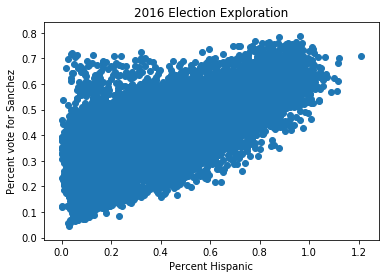

In [22]:
plt.title('2016 Election Exploration')
plt.scatter(df_sig['pct_hispanic'], df_sig['pct_sanchez'])
plt.xlabel('Percent Hispanic')
plt.ylabel('Percent vote for Sanchez')

# Sanchez is from Orange County

There is a noticible correlation between % hispanic and Sanchez's vote share.

Change this later:

First should be some simple visualizations. Then strong correlations between certain data. Then reshape (?) dataframe for F and pval. 


Text(0, 0.5, 'Percent vote for Trump')

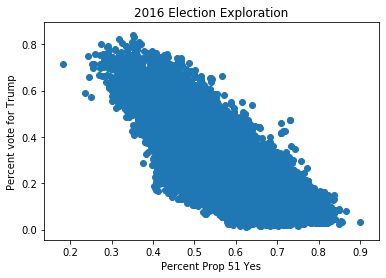

In [25]:
plt.title('2016 Election Exploration')
plt.scatter(df_sig['pct_prop51_yes'], df_sig['pct_trump'])
plt.xlabel('Percent Prop 51 Yes')
plt.ylabel('Percent vote for Trump')

# FYI:
# Total votes: 14,610,509
# President: 14,181,595
# Registered voters: 19,411,771


Text(0, 0.5, 'Percent vote for Trump')

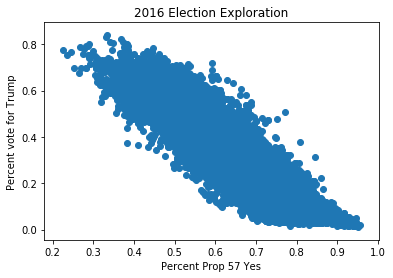

In [27]:
plt.title('2016 Election Exploration')
plt.scatter(df_sig['pct_prop57_yes'], df_sig['pct_trump'])
plt.xlabel('Percent Prop 57 Yes')
plt.ylabel('Percent vote for Trump')

# Total votes: 13,620,436


Text(0, 0.5, 'Percent Trump')

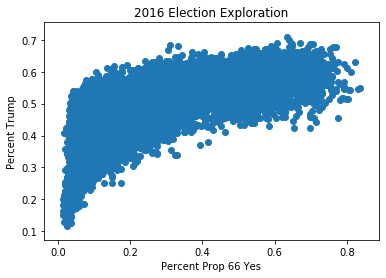

In [29]:
plt.title('2016 Election Exploration')
plt.scatter(df_sig['pct_trump'], df_sig['pct_prop66_yes'])
plt.xlabel('Percent Prop 66 Yes')
plt.ylabel('Percent Trump')

Text(0, 0.5, 'Percent Trump')

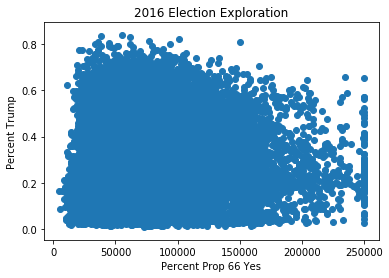

In [97]:
plt.title('2016 Election Exploration')
plt.scatter(df['Estimates: Median household income in the past 12 months (in 2017 inflation-adjusted dollars)'], df['pct_trump'])
plt.xlabel('Percent Prop 66 Yes')
plt.ylabel('Percent Trump')



Text(0, 0.5, 'Percent Prop 67 Yes')

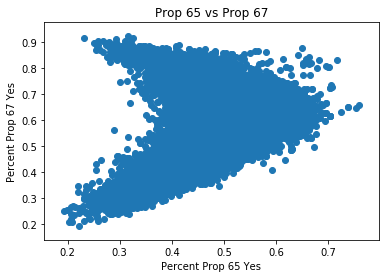

In [59]:
plt.title('Prop 65 vs Prop 67')
mask = (df[df['prop65_yes'] > 60])

plt.scatter(mask['pct_prop65_yes'], mask['pct_prop67_yes'])
plt.xlabel('Percent Prop 65 Yes')
plt.ylabel('Percent Prop 67 Yes')

This looks like an arrow sign. Pretty cool? But there's something more interesting going on...

##  Prop 65 and Prop 67

### Background

Prop 65 "Redirects money collected by grocery and certain other retail stores through mandated sale of carryout bags" to a special environmental fund.

Prop 67 "prohibits grocery and other stores from providing customers single–use plastic or paper carryout bags".

Prop 65 failed 46.10% to 53.90%

Prop 67 passed 53.27% to 46.73%

[Full text](https://vig.cdn.sos.ca.gov/2016/general/en/pdf/text-proposed-laws.pdf) of the ballot proposition.
[Alt](https://web.archive.org/web/20161016122612/http://vig.cdn.sos.ca.gov/2016/general/en/pdf/text-proposed-laws.pdf)


[Prop 65](https://en.wikipedia.org/wiki/2016_California_Proposition_65)

[Prop 67](https://en.wikipedia.org/wiki/2016_California_Proposition_67)




### Proposition 65

<img src="./images/CaliforniaProposition65.png" width=300>

### Proposition 67

<img src="./images/CaliforniaProposition67.png" width=300>

Let's look at 4 different cultural centers in California:

- San Francisco County (SF, Nancy Pelosi)
- Santa Clara (Bay Area)
- San Diego (Suburban SoCal)
- Kern (Bakersfield, Kevin McCarthy)

Text(0.5, 1.0, 'All Precincts: Prop 65 vs Prop 67 Vote')

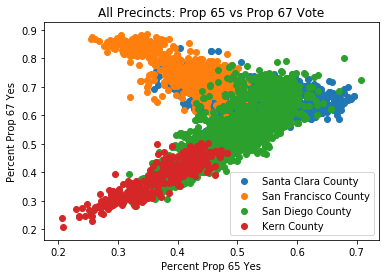

In [68]:
mask = (df[df['prop65_yes'] > 60])

counties = ['Santa Clara County', 'San Francisco County', 'San Diego County', 'Kern County']
for ct in counties:
    plt.scatter(mask[mask['County Name'] == ct]['pct_prop65_yes'], mask[mask['County Name'] == ct]['pct_prop67_yes'])
    
plt.legend(counties)
plt.xlabel('Percent Prop 65 Yes')
plt.ylabel('Percent Prop 67 Yes')
plt.title('All Precincts: Prop 65 vs Prop 67 Vote')

__Now, the two trends seem to be clearer.__

On the surface, the two texts appear to appeal to the same groups. Indeed, outside of the bay area, the correlation was almost always 1.

From personal experience, activism in SF contributed to the disparity: See sources below.

Several Democratic-leaning organizations advised a vote for prop 67 and against prop 65.

- [League of Woman Voters](https://lwvc.org/vote/elections/ballot-recommendations/prop-65-sowing-confusion-about-plastic-bag-ban)
- [SF Chronicle](https://www.sfchronicle.com/opinion/editorials/article/Chronicle-recommends-Yes-on-Prop-67-No-on-9187312.php)
- [California Democratic Party](https://www.cadem.org/vote/body/CDP-Propositions.pdf)
- [San Diego Republican Party](http://www.sandiegorepublicans.org/2016-endorsements.html)

- The California Democratic Party's official position was no endorsement for prop 65, and yes on 67.

- The San Diego Republican Party's official position was yes on prop 65 and no on 67.

### What conclusion can we draw?

- Voting percentages show political leanings.

- Cluster density shows the relative political homogeneity in the district.

- __Negative Correlation: Different information sources and voting logic.__

Below are several Bay Area counties plotted on one graph.

Text(0.5, 1.0, 'All Precincts: Prop 65 vs Prop 67 Vote')

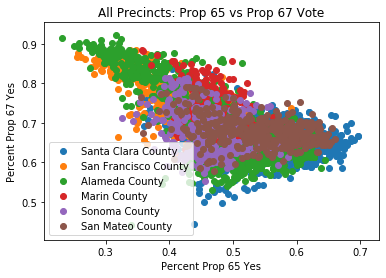

In [81]:
mask = (df[df['prop65_yes'] > 60])
# mask = df

# counties = ['Santa Clara County', 'San Francisco County', 'San Diego County', 'Kern County']
counties = ['Santa Clara County', 'San Francisco County', 'Alameda County', "Marin County", 'Sonoma County', 'San Mateo County']
for ct in counties:
    plt.scatter(mask[mask['County Name'] == ct]['pct_prop65_yes'], mask[mask['County Name'] == ct]['pct_prop67_yes'])
    
plt.legend(counties)
plt.xlabel('Percent Prop 65 Yes')
plt.ylabel('Percent Prop 67 Yes')
plt.title('All Precincts: Prop 65 vs Prop 67 Vote')


### Further segmentation

Text(0.5, 1.0, 'Majority Non-White Census Blocks Only')

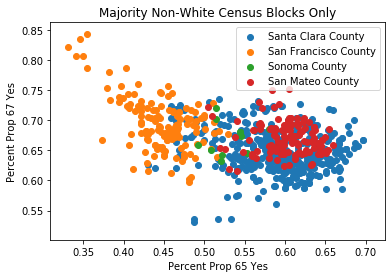

In [92]:
# new mask
mask = (df[df['pct_white'] < .25])
mask = (mask[mask['prop65_yes'] > 60])

# counties = ['Santa Clara County', 'San Francisco County', 'San Diego County', 'Kern County']
counties = ['Santa Clara County', 'San Francisco County', 'Sonoma County', 'San Mateo County']

for ct in counties:
    plt.scatter(mask[mask['County Name'] == ct]['pct_prop65_yes'], mask[mask['County Name'] == ct]['pct_prop67_yes'])
    
plt.legend(counties)
plt.xlabel('Percent Prop 65 Yes')
plt.ylabel('Percent Prop 67 Yes')
plt.title('Majority Non-White Census Blocks Only')

Text(0.5, 1.0, 'Majority Non-Hispanic White Census Blocks Only')

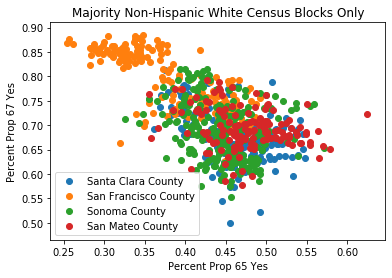

In [91]:
# new mask
mask = (df[df['pct_white'] > .6])
mask = (mask[mask['prop65_yes'] > 20])

# counties = ['Santa Clara County', 'San Francisco County', 'Orange County', 'Kern County']
counties = ['Santa Clara County', 'San Francisco County', 'Sonoma County', 'San Mateo County']

for ct in counties:
    plt.scatter(mask[mask['County Name'] == ct]['pct_prop65_yes'], mask[mask['County Name'] == ct]['pct_prop67_yes'])
    
plt.legend(counties)
plt.xlabel('Percent Prop 65 Yes')
plt.ylabel('Percent Prop 67 Yes')
plt.title('Majority Non-Hispanic White Census Blocks Only')

Text(0.5, 1.0, 'Majority Hispanic Census Blocks Only')

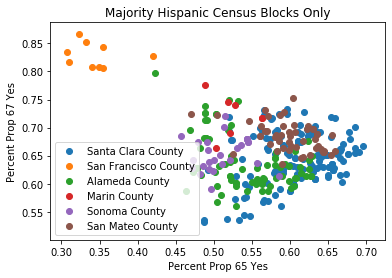

In [82]:
# new mask
mask = (df[df['pct_hispanic'] > .5])
mask = (mask[mask['prop65_yes'] > 20])

counties = ['Santa Clara County', 'San Francisco County', 'Alameda County', "Marin County", 'Sonoma County', 'San Mateo County']
for ct in counties:
    plt.scatter(mask[mask['County Name'] == ct]['pct_prop65_yes'], mask[mask['County Name'] == ct]['pct_prop67_yes'])
    
plt.legend(counties)
plt.xlabel('Percent Prop 65 Yes')
plt.ylabel('Percent Prop 67 Yes')
plt.title('Majority Hispanic Census Blocks Only')

Text(0.5, 1.0, 'Election Exploration')

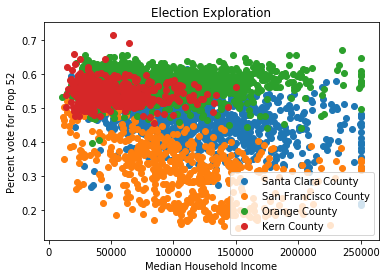

In [118]:
mask = df[df['Estimates: Median household income in the past 12 months (in 2017 inflation-adjusted dollars)'] > 30000]
# mask = mask[mask['Estimates: Median household income in the past 12 months (in 2017 inflation-adjusted dollars)'] < 150000]
mask = df
counties = ['Santa Clara County', 'San Francisco County', 'Orange County', 'Kern County']
for ct in counties:
    plt.scatter(mask[mask['County Name'] == ct]\
                ['Estimates: Median household income in the past 12 months (in 2017 inflation-adjusted dollars)'], 
                mask[mask['County Name'] == ct]['pct_prop53_yes'])
    
plt.legend(counties)
plt.xlabel('Median Household Income')
plt.ylabel('Percent vote for Prop 52')
plt.title('Election Exploration')

_More visualizations to follow._

But on to the exciting part...

## Machine Learning

In [249]:
from scipy import stats
from scipy.stats import randint, uniform
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split #, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import f_regression, SelectKBest

Text(0.5, 1.0, 'Sanchez Vote Share Exploration')

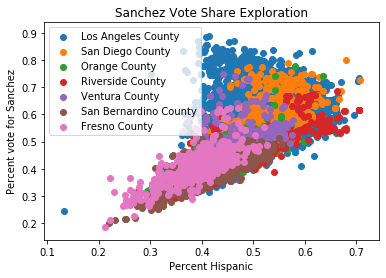

In [136]:
# new mask
mask = (df[df['ussenate_sanchez'] > 10])
mask = mask[mask['pct_hispanic'] > 0.1]
counties = ['Los Angeles County','San Diego County', 'Orange County', 'Riverside County', 'Ventura County', 'San Bernardino County', 'Fresno County']
for ct in counties:
    plt.scatter(mask[mask['County Name'] == ct]['pct_prop65_yes'], mask[mask['County Name'] == ct]['pct_prop67_yes'])
plt.legend(counties)
plt.xlabel('Percent Hispanic')
plt.ylabel('Percent vote for Sanchez')
plt.title('Sanchez Vote Share Exploration')

Text(0, 0.5, 'Percent vote for Sanchez')

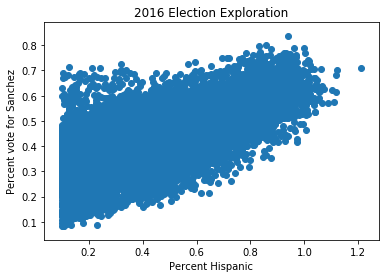

In [137]:
plt.title('2016 Election Exploration')
plt.scatter(mask['pct_hispanic'], mask['pct_sanchez'])
plt.xlabel('Percent Hispanic')
plt.ylabel('Percent vote for Sanchez')

### Model Training

Feature importance and model selection

In [197]:
mask = (df[df['ussenate_sanchez'] > 10])
# mask = mask[mask['pct_hispanic'] > 0.1]
print(len(mask))
mask = mask.dropna()
mask = mask[df.columns[125:]]
print(len(mask))

X = np.array(mask['pct_hispanic']).reshape(-1,1)
y = np.array(mask['pct_sanchez']) #

F, pval  = f_regression(mask, y.ravel())
pd.DataFrame(F,index=mask.columns,columns=['linear correlation']).sort_values('linear correlation',ascending=False)#.head()

22736
22153


,linear correlation
pct_hispanic,24309.59
pct_prop53_yes,14106.23
pct_prop60_yes,12531.38
pct_prop64_yes,10090.35
pct_prop67_yes,9937.57
pct_prop66_yes,9721.05
pct_prop59_yes,8657.22
pct_white,6466.16
pct_prop62_yes,5814.58
pct_prop57_yes,3259.63


In [198]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5150)

In [ ]:
clf = GradientBoostingRegressor(loss='quantile', alpha=alpha,
                                n_estimators=64, max_depth=3,
                                learning_rate=.075, min_samples_leaf=6,
                                min_samples_split=6)

In [189]:
clf.fit(X, y)
y_upper = clf.predict(X)

In [190]:
clf.set_params(alpha=1.0 - alpha)
clf.fit(X, y)

# Make the prediction on the meshed x-axis
y_lower = clf.predict(X)

clf.set_params(loss='ls')
clf.fit(X, y)

# Make the prediction on the meshed x-axis
y_pred = clf.predict(X)

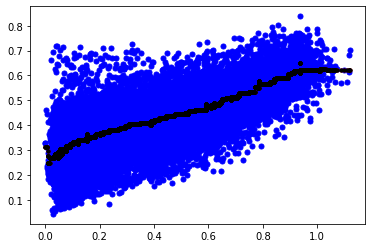

In [206]:
fig = plt.figure()
plt.plot(X, y, 'b.', markersize=10, label=u'Observations')
plt.plot(X, y_pred, 'r.', label=u'Prediction')
plt.plot(X, y_upper, 'k.')
plt.plot(X, y_lower, 'k.')

In [199]:
# combine test
regressor = GradientBoostingRegressor(verbose = 1)


param_dist = {"max_depth": randint(1, 11),
              "learning_rate": uniform(),
              "max_features": ["auto", "sqrt", "log2"],
              "min_samples_split": randint(2, 50),
              "min_samples_leaf": randint(1, 11),
              "n_estimators": randint(50,150),
              "criterion": ["friedman_mse"]}

n_iter_search = 100

def exp_mean_squared_error(estimator, X, y):
    y_predicted = np.exp(estimator.predict(X))
    y_true = np.exp(y)
    return -np.sqrt(mean_squared_error(y_true, y_predicted))

random_search = RandomizedSearchCV(regressor, 
                                   param_distributions=param_dist,
                                   n_iter=n_iter_search,
                                   scoring = exp_mean_squared_error,
                                   random_state = 5150)


In [200]:
random_search.fit(X, y)

C:\Users\Jerod\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


      Iter       Train Loss   Remaining Time 
         1           0.0134            0.14s
         2           0.0123            0.21s
         3           0.0114            0.18s
         4           0.0107            0.20s
         5           0.0100            0.19s
         6           0.0095            0.20s
         7           0.0091            0.21s
         8           0.0087            0.20s
         9           0.0084            0.20s
        10           0.0082            0.19s
        20           0.0071            0.17s
        30           0.0069            0.16s
        40           0.0069            0.14s
        50           0.0068            0.12s
        60           0.0068            0.11s
        70           0.0068            0.09s
        80           0.0068            0.08s
        90           0.0068            0.06s
       100           0.0068            0.05s
      Iter       Train Loss   Remaining Time 
         1           0.0134            0.14s
        

        90           0.0053            0.09s
       100           0.0053            0.05s
      Iter       Train Loss   Remaining Time 
         1           0.0067            0.69s
         2           0.0063            0.57s
         3           0.0062            0.53s
         4           0.0062            0.50s
         5           0.0061            0.49s
         6           0.0061            0.46s
         7           0.0061            0.45s
         8           0.0061            0.45s
         9           0.0060            0.43s
        10           0.0060            0.41s
        20           0.0059            0.35s
        30           0.0057            0.31s
        40           0.0056            0.27s
        50           0.0055            0.23s
        60           0.0055            0.19s
        70           0.0054            0.16s
        80           0.0053            0.12s
        90           0.0052            0.09s
       100           0.0051            0.06s
      Ite

        30           0.0067            0.09s
        40           0.0067            0.09s
        50           0.0067            0.08s
        60           0.0066            0.07s
        70           0.0066            0.06s
        80           0.0065            0.05s
        90           0.0065            0.04s
       100           0.0065            0.03s
      Iter       Train Loss   Remaining Time 
         1           0.0094            0.13s
         2           0.0077            0.19s
         3           0.0071            0.17s
         4           0.0069            0.15s
         5           0.0068            0.15s
         6           0.0068            0.14s
         7           0.0068            0.14s
         8           0.0068            0.13s
         9           0.0068            0.13s
        10           0.0067            0.14s
        20           0.0067            0.11s
        30           0.0066            0.09s
        40           0.0066            0.08s
        5

        70           0.0059            0.05s
        80           0.0058            0.03s
        90           0.0057            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0094            0.27s
         2           0.0076            0.27s
         3           0.0070            0.24s
         4           0.0067            0.24s
         5           0.0066            0.24s
         6           0.0066            0.23s
         7           0.0065            0.23s
         8           0.0065            0.23s
         9           0.0065            0.22s
        10           0.0065            0.23s
        20           0.0063            0.18s
        30           0.0062            0.15s
        40           0.0060            0.12s
        50           0.0059            0.10s
        60           0.0058            0.07s
        70           0.0057            0.05s
        80           0.0057            0.03s
        90           0.0056            0.00s
      Ite

        30           0.0062            0.31s
        40           0.0062            0.27s
        50           0.0061            0.23s
        60           0.0061            0.19s
        70           0.0061            0.16s
        80           0.0061            0.13s
        90           0.0061            0.10s
       100           0.0061            0.07s
      Iter       Train Loss   Remaining Time 
         1           0.0119            0.49s
         2           0.0102            0.49s
         3           0.0090            0.48s
         4           0.0081            0.48s
         5           0.0076            0.48s
         6           0.0072            0.47s
         7           0.0069            0.47s
         8           0.0067            0.46s
         9           0.0066            0.45s
        10           0.0065            0.44s
        20           0.0062            0.36s
        30           0.0061            0.33s
        40           0.0061            0.28s
        5

         5           0.0096            0.23s
         6           0.0090            0.24s
         7           0.0085            0.23s
         8           0.0082            0.22s
         9           0.0078            0.22s
        10           0.0076            0.22s
        20           0.0065            0.15s
        30           0.0063            0.10s
        40           0.0062            0.06s
        50           0.0061            0.02s
      Iter       Train Loss   Remaining Time 
         1           0.0132            0.26s
         2           0.0120            0.26s
         3           0.0110            0.27s
         4           0.0102            0.26s
         5           0.0095            0.25s
         6           0.0089            0.25s
         7           0.0085            0.23s
         8           0.0081            0.23s
         9           0.0078            0.22s
        10           0.0075            0.22s
        20           0.0064            0.15s
        3

        60           0.0058            0.04s
        70           0.0057            0.02s
        80           0.0057            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0088            0.16s
         2           0.0072            0.19s
         3           0.0068            0.18s
         4           0.0066            0.17s
         5           0.0066            0.18s
         6           0.0065            0.17s
         7           0.0065            0.17s
         8           0.0065            0.16s
         9           0.0065            0.16s
        10           0.0065            0.15s
        20           0.0063            0.12s
        30           0.0061            0.10s
        40           0.0059            0.08s
        50           0.0058            0.06s
        60           0.0057            0.04s
        70           0.0056            0.02s
        80           0.0055            0.00s
      Iter       Train Loss   Remaining Time 
        

         5           0.0064            0.29s
         6           0.0063            0.31s
         7           0.0063            0.30s
         8           0.0063            0.29s
         9           0.0062            0.29s
        10           0.0062            0.28s
        20           0.0060            0.27s
        30           0.0059            0.22s
        40           0.0058            0.19s
        50           0.0057            0.15s
        60           0.0056            0.13s
        70           0.0055            0.10s
        80           0.0054            0.07s
        90           0.0053            0.05s
       100           0.0053            0.02s
      Iter       Train Loss   Remaining Time 
         1           0.0098            0.50s
         2           0.0077            0.55s
         3           0.0069            0.57s
         4           0.0065            0.57s
         5           0.0063            0.55s
         6           0.0061            0.54s
         

        70           0.0051            0.21s
        80           0.0050            0.18s
        90           0.0049            0.15s
       100           0.0049            0.11s
      Iter       Train Loss   Remaining Time 
         1           0.0113            0.07s
         2           0.0097            0.07s
         3           0.0086            0.07s
         4           0.0081            0.07s
         5           0.0077            0.05s
         6           0.0074            0.06s
         7           0.0073            0.06s
         8           0.0072            0.06s
         9           0.0071            0.05s
        10           0.0071            0.05s
        20           0.0069            0.04s
        30           0.0069            0.03s
        40           0.0069            0.02s
        50           0.0069            0.01s
        60           0.0069            0.01s
        70           0.0069            0.00s
      Iter       Train Loss   Remaining Time 
        

      Iter       Train Loss   Remaining Time 
         1           0.0072            0.41s
         2           0.0068            0.34s
         3           0.0067            0.32s
         4           0.0067            0.30s
         5           0.0066            0.29s
         6           0.0066            0.29s
         7           0.0066            0.30s
         8           0.0066            0.29s
         9           0.0065            0.29s
        10           0.0065            0.28s
        20           0.0063            0.24s
        30           0.0062            0.21s
        40           0.0061            0.19s
        50           0.0059            0.17s
        60           0.0059            0.15s
        70           0.0058            0.13s
        80           0.0057            0.11s
        90           0.0056            0.09s
       100           0.0055            0.07s
      Iter       Train Loss   Remaining Time 
         1           0.0071            0.28s
        

        50           0.0067            0.38s
        60           0.0065            0.34s
        70           0.0064            0.30s
        80           0.0063            0.26s
        90           0.0062            0.22s
       100           0.0062            0.18s
      Iter       Train Loss   Remaining Time 
         1           0.0106            0.29s
         2           0.0085            0.28s
         3           0.0074            0.26s
         4           0.0069            0.25s
         5           0.0066            0.25s
         6           0.0064            0.24s
         7           0.0063            0.23s
         8           0.0062            0.22s
         9           0.0062            0.21s
        10           0.0061            0.21s
        20           0.0060            0.14s
        30           0.0059            0.10s
        40           0.0058            0.06s
        50           0.0058            0.03s
      Iter       Train Loss   Remaining Time 
        

        80           0.0057            0.14s
        90           0.0056            0.12s
       100           0.0056            0.09s
      Iter       Train Loss   Remaining Time 
         1           0.0069            0.41s
         2           0.0066            0.40s
         3           0.0065            0.40s
         4           0.0065            0.40s
         5           0.0065            0.37s
         6           0.0065            0.37s
         7           0.0064            0.37s
         8           0.0064            0.35s
         9           0.0064            0.37s
        10           0.0064            0.37s
        20           0.0062            0.32s
        30           0.0060            0.28s
        40           0.0060            0.25s
        50           0.0059            0.22s
        60           0.0059            0.19s
        70           0.0057            0.17s
        80           0.0057            0.14s
        90           0.0056            0.12s
       10

        40           0.0063            0.14s
        50           0.0062            0.11s
        60           0.0061            0.08s
        70           0.0061            0.05s
        80           0.0060            0.03s
        90           0.0060            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0098            0.00s
         2           0.0079            0.70s
         3           0.0071            0.46s
         4           0.0068            0.34s
         5           0.0067            0.27s
         6           0.0066            0.22s
         7           0.0066            0.37s
         8           0.0065            0.32s
         9           0.0065            0.28s
        10           0.0065            0.25s
        20           0.0063            0.17s
        30           0.0062            0.16s
        40           0.0061            0.12s
        50           0.0061            0.09s
        60           0.0060            0.07s
        7

         2           0.0126            0.17s
         3           0.0117            0.23s
         4           0.0110            0.23s
         5           0.0104            0.22s
         6           0.0099            0.22s
         7           0.0094            0.22s
         8           0.0090            0.21s
         9           0.0087            0.21s
        10           0.0084            0.21s
        20           0.0071            0.17s
        30           0.0068            0.14s
        40           0.0067            0.11s
        50           0.0066            0.09s
        60           0.0066            0.06s
        70           0.0066            0.04s
        80           0.0066            0.02s
      Iter       Train Loss   Remaining Time 
         1           0.0134            0.18s
         2           0.0124            0.22s
         3           0.0116            0.23s
         4           0.0109            0.21s
         5           0.0103            0.20s
         

        50           0.0057            0.41s
        60           0.0057            0.35s
        70           0.0057            0.31s
        80           0.0057            0.26s
        90           0.0056            0.22s
       100           0.0056            0.18s
      Iter       Train Loss   Remaining Time 
         1           0.0094            0.28s
         2           0.0076            0.33s
         3           0.0069            0.31s
         4           0.0066            0.30s
         5           0.0065            0.31s
         6           0.0065            0.28s
         7           0.0064            0.28s
         8           0.0064            0.27s
         9           0.0064            0.27s
        10           0.0063            0.25s
        20           0.0062            0.21s
        30           0.0061            0.18s
        40           0.0060            0.15s
        50           0.0059            0.12s
        60           0.0058            0.09s
        7

        30           0.0060            0.06s
        40           0.0059            0.03s
        50           0.0058            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0134            0.20s
         2           0.0124            0.20s
         3           0.0115            0.20s
         4           0.0107            0.19s
         5           0.0101            0.19s
         6           0.0096            0.19s
         7           0.0091            0.19s
         8           0.0088            0.19s
         9           0.0085            0.18s
        10           0.0082            0.18s
        20           0.0071            0.16s
        30           0.0069            0.13s
        40           0.0068            0.11s
        50           0.0068            0.09s
        60           0.0067            0.07s
        70           0.0067            0.05s
        80           0.0067            0.04s
        90           0.0067            0.02s
       10

        40           0.0062            0.11s
        50           0.0061            0.08s
        60           0.0061            0.06s
        70           0.0060            0.03s
        80           0.0060            0.01s
      Iter       Train Loss   Remaining Time 
         1           0.0078            0.25s
         2           0.0068            0.29s
         3           0.0065            0.27s
         4           0.0065            0.26s
         5           0.0065            0.25s
         6           0.0064            0.25s
         7           0.0064            0.23s
         8           0.0064            0.23s
         9           0.0064            0.22s
        10           0.0063            0.21s
        20           0.0062            0.17s
        30           0.0061            0.14s
        40           0.0060            0.11s
        50           0.0060            0.09s
        60           0.0059            0.06s
        70           0.0059            0.03s
        8

         3           0.0069            0.45s
         4           0.0066            0.48s
         5           0.0064            0.46s
         6           0.0064            0.46s
         7           0.0063            0.44s
         8           0.0063            0.42s
         9           0.0063            0.41s
        10           0.0062            0.40s
        20           0.0061            0.33s
        30           0.0060            0.28s
        40           0.0058            0.25s
        50           0.0058            0.22s
        60           0.0057            0.19s
        70           0.0056            0.16s
        80           0.0055            0.13s
        90           0.0054            0.10s
       100           0.0054            0.07s
      Iter       Train Loss   Remaining Time 
         1           0.0095            0.50s
         2           0.0076            0.49s
         3           0.0068            0.49s
         4           0.0065            0.45s
         

        70           0.0071            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0089            0.56s
         2           0.0072            0.46s
         3           0.0067            0.42s
         4           0.0065            0.40s
         5           0.0064            0.37s
         6           0.0063            0.35s
         7           0.0063            0.34s
         8           0.0063            0.32s
         9           0.0063            0.31s
        10           0.0063            0.30s
        20           0.0062            0.23s
        30           0.0061            0.19s
        40           0.0060            0.16s
        50           0.0060            0.12s
        60           0.0059            0.10s
        70           0.0058            0.07s
        80           0.0058            0.04s
        90           0.0057            0.01s
      Iter       Train Loss   Remaining Time 
         1           0.0088            0.37s
        

      Iter       Train Loss   Remaining Time 
         1           0.0089            0.23s
         2           0.0074            0.22s
         3           0.0070            0.22s
         4           0.0068            0.22s
         5           0.0068            0.24s
         6           0.0068            0.23s
         7           0.0067            0.23s
         8           0.0067            0.21s
         9           0.0067            0.21s
        10           0.0067            0.21s
        20           0.0066            0.16s
        30           0.0065            0.14s
        40           0.0064            0.12s
        50           0.0064            0.10s
        60           0.0063            0.09s
        70           0.0062            0.07s
        80           0.0062            0.05s
        90           0.0061            0.04s
       100           0.0061            0.02s
      Iter       Train Loss   Remaining Time 
         1           0.0088            0.23s
        

         4           0.0064            0.40s
         5           0.0063            0.38s
         6           0.0063            0.36s
         7           0.0063            0.35s
         8           0.0062            0.34s
         9           0.0062            0.34s
        10           0.0062            0.33s
        20           0.0060            0.27s
        30           0.0058            0.23s
        40           0.0056            0.20s
        50           0.0055            0.17s
        60           0.0053            0.14s
        70           0.0052            0.11s
        80           0.0050            0.09s
        90           0.0049            0.06s
       100           0.0048            0.03s
      Iter       Train Loss   Remaining Time 
         1           0.0079            0.44s
         2           0.0067            0.43s
         3           0.0064            0.39s
         4           0.0063            0.37s
         5           0.0063            0.38s
         

        30           0.0064            0.11s
        40           0.0063            0.08s
        50           0.0062            0.05s
        60           0.0062            0.01s
      Iter       Train Loss   Remaining Time 
         1           0.0110            0.19s
         2           0.0090            0.19s
         3           0.0079            0.19s
         4           0.0073            0.20s
         5           0.0070            0.19s
         6           0.0068            0.18s
         7           0.0066            0.17s
         8           0.0065            0.17s
         9           0.0065            0.17s
        10           0.0065            0.16s
        20           0.0063            0.12s
        30           0.0062            0.09s
        40           0.0062            0.06s
        50           0.0062            0.04s
        60           0.0061            0.01s
      Iter       Train Loss   Remaining Time 
         1           0.0109            0.25s
        

        40           0.0060            0.20s
        50           0.0059            0.16s
        60           0.0059            0.14s
        70           0.0058            0.11s
        80           0.0057            0.08s
        90           0.0056            0.05s
       100           0.0055            0.02s
      Iter       Train Loss   Remaining Time 
         1           0.0101            0.15s
         2           0.0087            0.11s
         3           0.0078            0.12s
         4           0.0075            0.11s
         5           0.0073            0.10s
         6           0.0072            0.09s
         7           0.0072            0.09s
         8           0.0071            0.08s
         9           0.0071            0.08s
        10           0.0071            0.08s
        20           0.0070            0.05s
        30           0.0070            0.04s
        40           0.0070            0.03s
        50           0.0070            0.02s
        6

        80           0.0067            0.02s
        90           0.0067            0.01s
       100           0.0067            0.01s
      Iter       Train Loss   Remaining Time 
         1           0.0141            0.06s
         2           0.0136            0.03s
         3           0.0131            0.04s
         4           0.0126            0.04s
         5           0.0123            0.05s
         6           0.0119            0.05s
         7           0.0116            0.04s
         8           0.0113            0.04s
         9           0.0110            0.04s
        10           0.0107            0.04s
        20           0.0090            0.03s
        30           0.0081            0.02s
        40           0.0076            0.02s
        50           0.0073            0.01s
        60           0.0071            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0141            0.06s
         2           0.0136            0.03s
        

      Iter       Train Loss   Remaining Time 
         1           0.0069            0.28s
         2           0.0068            0.27s
         3           0.0068            0.23s
         4           0.0067            0.20s
         5           0.0067            0.21s
         6           0.0067            0.20s
         7           0.0067            0.21s
         8           0.0067            0.20s
         9           0.0066            0.19s
        10           0.0066            0.19s
        20           0.0065            0.16s
        30           0.0064            0.14s
        40           0.0063            0.12s
        50           0.0062            0.11s
        60           0.0061            0.10s
        70           0.0060            0.08s
        80           0.0060            0.07s
        90           0.0059            0.06s
       100           0.0059            0.05s
      Iter       Train Loss   Remaining Time 
         1           0.0072            0.12s
        

        80           0.0068            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0118            0.08s
         2           0.0100            0.08s
         3           0.0088            0.08s
         4           0.0081            0.10s
         5           0.0076            0.10s
         6           0.0074            0.09s
         7           0.0072            0.09s
         8           0.0070            0.09s
         9           0.0070            0.08s
        10           0.0069            0.08s
        20           0.0068            0.06s
        30           0.0068            0.05s
        40           0.0068            0.04s
        50           0.0068            0.03s
        60           0.0067            0.02s
        70           0.0067            0.01s
        80           0.0067            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0116            0.08s
         2           0.0099            0.08s
        

        50           0.0059            0.16s
        60           0.0058            0.14s
        70           0.0057            0.12s
        80           0.0056            0.10s
        90           0.0056            0.07s
       100           0.0055            0.05s
      Iter       Train Loss   Remaining Time 
         1           0.0075            0.06s
         2           0.0072            0.06s
         3           0.0072            0.08s
         4           0.0071            0.08s
         5           0.0071            0.07s
         6           0.0070            0.07s
         7           0.0070            0.07s
         8           0.0069            0.07s
         9           0.0069            0.07s
        10           0.0069            0.07s
        20           0.0068            0.05s
        30           0.0068            0.04s
        40           0.0067            0.03s
        50           0.0067            0.02s
        60           0.0066            0.01s
      Ite

       100           0.0059            0.05s
      Iter       Train Loss   Remaining Time 
         1           0.0075            0.24s
         2           0.0067            0.30s
         3           0.0065            0.36s
         4           0.0065            0.56s
         5           0.0065            0.58s
         6           0.0065            0.56s
         7           0.0065            0.54s
         8           0.0064            0.54s
         9           0.0064            0.53s
        10           0.0064            0.51s
        20           0.0063            0.37s
        30           0.0062            0.28s
        40           0.0061            0.23s
        50           0.0061            0.19s
        60           0.0059            0.16s
        70           0.0059            0.13s
        80           0.0058            0.10s
        90           0.0057            0.08s
       100           0.0056            0.05s
      Iter       Train Loss   Remaining Time 
        

        40           0.0059            0.21s
        50           0.0057            0.19s
        60           0.0056            0.16s
        70           0.0056            0.13s
        80           0.0055            0.10s
        90           0.0054            0.07s
       100           0.0054            0.04s
      Iter       Train Loss   Remaining Time 
         1           0.0066            0.63s
         2           0.0065            0.50s
         3           0.0065            0.45s
         4           0.0064            0.46s
         5           0.0064            0.44s
         6           0.0064            0.42s
         7           0.0063            0.41s
         8           0.0063            0.40s
         9           0.0063            0.39s
        10           0.0062            0.39s
        20           0.0060            0.34s
        30           0.0057            0.30s
        40           0.0054            0.27s
        50           0.0052            0.24s
        6

RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=GradientBoostingRegressor(alpha=0.9,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                       

In [204]:
print(random_search.best_estimator_)
clf = random_search.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.11224933561752426, loss='ls',
                          max_depth=2, max_features='log2', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=6, min_samples_split=22,
                          min_weight_fraction_leaf=0.0, n_estimators=75,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=1, warm_start=False)


In [208]:
np.std(np.exp(y))

0.18455301723091738

In [210]:
-random_search.best_score_

0.12395494072943115

In [207]:
-random_search.best_score_<np.std(np.exp(y))

True

In [211]:
y_expected = random_search.best_estimator_.predict(X_test)

In [228]:
efficiency_ratio = y_expected / y_test

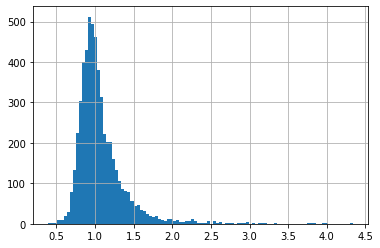

In [246]:
plt.grid(True)
plt.hist(efficiency_ratio, bins=100);

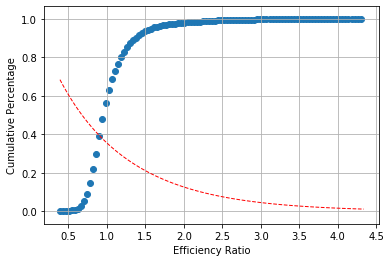

In [251]:
values, base = np.histogram(efficiency_ratio, bins=100)
cumulative = np.cumsum(values)
plt.scatter(base[:-1], cumulative/(len(efficiency_ratio)))
plt.grid(True)
plt.xlabel('Efficiency Ratio')
plt.ylabel('Cumulative Percentage')



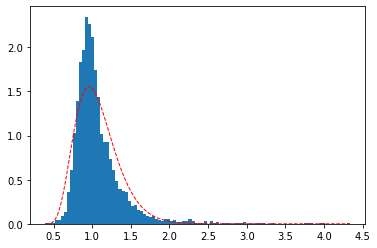

In [266]:
fit_alpha, fit_loc, fit_beta=stats.gamma.fit(efficiency_ratio)

n, bins, patches = plt.hist(efficiency_ratio, bins=100, density=1)
gamma_pdf = stats.gamma.pdf(bins,a=fit_alpha, loc=fit_loc, scale=fit_beta)
l = plt.plot(bins, gamma_pdf, 'r--', linewidth=1)

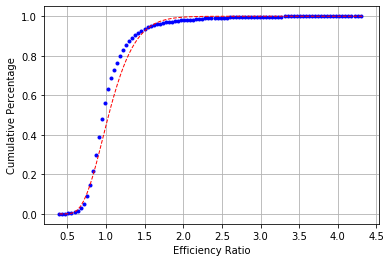

In [267]:
values, base = np.histogram(efficiency_ratio, bins=100)
cumulative = np.cumsum(values)
scatter = plt.plot(base[:-1], cumulative/len(efficiency_ratio), 'b.',label='Reference Data')
plt.grid(True)
plt.xlabel('Efficiency Ratio')
plt.ylabel('Cumulative Percentage')
line = plt.plot(base,stats.gamma.cdf(bins,a=fit_alpha, loc=fit_loc, scale=fit_beta),'r--', linewidth=1,label='Fitted Curve')
# plt.get_
#plt.legend([scatter,line],['Reference Data','Fitted Curve'],loc='best')

In [276]:
# need to apply efficiency_ratio over entire set

In [273]:
score = 1-stats.gamma.cdf(efficiency_ratio,a=fit_alpha, loc=fit_loc, scale=fit_beta)


(array([157.,  39.,  35.,  48.,  34.,  40.,  36.,  35.,  36.,  36.,  43.,
         22.,  51.,  41.,  31.,  30.,  36.,  34.,  38.,  36.,  43.,  43.,
         37.,  47.,  35.,  46.,  43.,  40.,  56.,  49.,  45.,  35.,  49.,
         44.,  41.,  42.,  38.,  52.,  45.,  44.,  55.,  49.,  57.,  62.,
         54.,  69.,  61.,  60.,  68.,  71.,  66.,  71.,  71.,  78.,  73.,
         69.,  89.,  79.,  81.,  77.,  76.,  83.,  92.,  82.,  77.,  78.,
         80.,  90.,  94.,  73.,  84.,  72.,  82.,  78.,  71.,  76.,  76.,
         68.,  67.,  68.,  78.,  60.,  56.,  50.,  64.,  84.,  48.,  54.,
         45.,  55.,  49.,  40.,  34.,  27.,  29.,  31.,  20.,  13.,  17.,
         26.]),
 array([2.53426946e-10, 1.00000002e-02, 2.00000002e-02, 3.00000002e-02,
        4.00000002e-02, 5.00000002e-02, 6.00000002e-02, 7.00000002e-02,
        8.00000002e-02, 9.00000002e-02, 1.00000000e-01, 1.10000000e-01,
        1.20000000e-01, 1.30000000e-01, 1.40000000e-01, 1.50000000e-01,
        1.60000000e-01, 1.7000

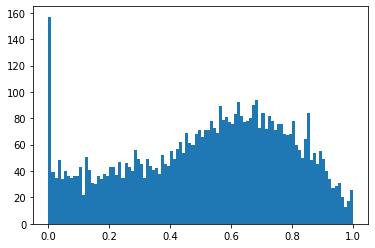

In [275]:
plt.hist(score, bins=100)

In [226]:
y_train

array([0.38246041, 0.58823529, 0.30106572, ..., 0.64675325, 0.39302694,
       0.45466847])

In [214]:
random_search.best_estimator_.predict(X[0].reshape(1,-1))

array([0.36572272])

In [215]:
np.mean(y_expected),np.mean(y)

(0.40357910353843424, 0.4026698608342646)

In [224]:
random_search.best_estimator_.predict(X)

array([0.36572272, 0.37312821, 0.34020743, ..., 0.35373226, 0.37312821,
       0.37914397])

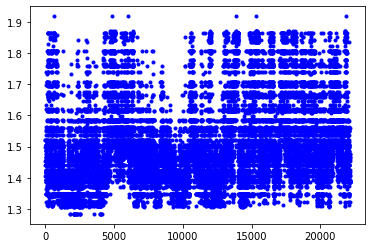

In [222]:
plt.plot(np.exp(random_search.best_estimator_.predict(X)), 'b.')

      Iter       Train Loss   Remaining Time 
         1           0.0132            0.15s
         2           0.0120            0.15s
         3           0.0110            0.14s
         4           0.0102            0.14s
         5           0.0096            0.15s
         6           0.0090            0.15s
         7           0.0086            0.16s
         8           0.0083            0.15s
         9           0.0080            0.15s
        10           0.0078            0.14s
        20           0.0070            0.11s
        30           0.0069            0.09s
        40           0.0069            0.07s
        50           0.0069            0.05s
        60           0.0068            0.03s
        70           0.0068            0.01s
      Iter       Train Loss   Remaining Time 
         1           0.0132            0.15s
         2           0.0120            0.15s
         3           0.0110            0.14s
         4           0.0102            0.14s
        

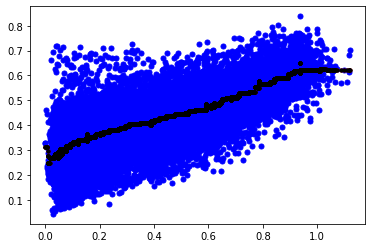

In [205]:

y_upper = clf.predict(X)

clf.set_params(alpha=1.0 - alpha)
clf.fit(X, y)

# Make the prediction on the meshed x-axis
y_lower = clf.predict(X)

clf.set_params(loss='ls')
clf.fit(X, y)

# Make the prediction on the meshed x-axis
y_pred = clf.predict(X)

fig = plt.figure()
plt.plot(X, y, 'b.', markersize=10, label=u'Observations')
plt.plot(X, y_pred, 'r.', label=u'Prediction')
plt.plot(X, y_upper, 'k.')
plt.plot(X, y_lower, 'k.')